<a href="https://colab.research.google.com/github/jejec0703/Machine-Learning-Deep-Learning/blob/master/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 분류 목적

### keras 
### High Level API

In [ ]:
from tensorflow import keras
import tensorflow as tf

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train[0].shape

(28, 28)

Text(0.5, 1.0, '5')

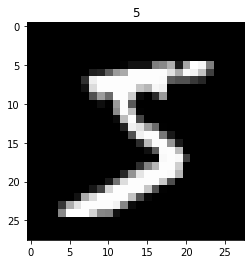

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], 'gray')
plt.title(y_train[0])

In [ ]:
image = X_train[0]
image.shape

(28, 28)

In [ ]:
image = image[..., tf.newaxis]
image.shape

(28, 28, 1)

In [ ]:
import numpy as np
X_train[0].max(), X_train[0].min()

(255, 0)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_train.shape

(60000, 10)

In [ ]:
# 첫번째 방법
L = tf.keras.layers
model = tf.keras.Sequential([
                             L.Flatten(),
                             L.Dense(128, activation='relu'),
                             L.Dense(64, activation='relu'),
                             L.Dense(32, activation='relu'),
                             L.Dense(10, activation='softmax'),
                             L.Dropout(0.2)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.4461 - accuracy: 0.7411
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2691 - accuracy: 0.7773
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2912 - accuracy: 0.7807
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2375 - accuracy: 0.7865
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.3019 - accuracy: 0.7843
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2784 - accuracy: 0.7867
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2599 - accuracy: 0.7892
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2571 - accuracy: 0.7902
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2668 - accuracy: 0.7904
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.258

In [ ]:
# 두 번째 방법
L = tf.keras.layers
model = tf.keras.Sequential([
                             L.Flatten(),
                             L.Dense(128, activation='relu'),
                             L.Dense(64, activation='relu'),
                             L.Dense(32, activation='relu'),
                             L.Dense(10, activation='softmax'),
                             L.Dropout(0.2)
])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5
)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, callbacks=[early_stopping], epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.4583 - accuracy: 0.7370
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2732 - accuracy: 0.7757
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.3205 - accuracy: 0.7786
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2899 - accuracy: 0.7828
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2786 - accuracy: 0.7855
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2650 - accuracy: 0.7878
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2513 - accuracy: 0.7898
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2117 - accuracy: 0.7935
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.2695 - accuracy: 0.7902
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.235

In [ ]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0252 - accuracy: 0.9923


[0.025197168812155724, 0.9922666549682617]

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000, 10))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (1000, 10))

In [ ]:
y_test = y_test.reshape(-1, 10)

In [ ]:
model.evaluate(X_test, y_test)

ValueError: ignored

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  100480    
_________________________________________________________________
dense_11 (Dense)             multiple                  8256      
_________________________________________________________________
dense_12 (Dense)             multiple                  2080      
_________________________________________________________________
dense_13 (Dense)             multiple                  330       
_________________________________________________________________
dropout_3 (Dropout)          multiple                  0         
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
________________________________________________

In [ ]:
################################################################
###############이거보기#########################################

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train.max(), X_train.min()

(255, 0)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
# y_train = tf.keras.utils.to_categorical(y_train)
# y_train.shape

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation='relu'),
                                 keras.layers.Dense(256, activation='relu'),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2123 - accuracy: 0.9362
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0914 - accuracy: 0.9729
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0684 - accuracy: 0.9796
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0528 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0441 - accuracy: 0.9863


In [ ]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0222 - accuracy: 0.9934


[0.02219407819211483, 0.9934333562850952]

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0792 - accuracy: 0.9785


[0.0792367234826088, 0.9785000085830688]

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          multiple                  0         
_________________________________________________________________
dense_18 (Dense)             multiple                  401920    
_________________________________________________________________
dense_19 (Dense)             multiple                  131328    
_________________________________________________________________
dense_20 (Dense)             multiple                  32896     
_________________________________________________________________
dropout_5 (Dropout)          multiple                  0         
_________________________________________________________________
dense_21 (Dense)             multiple                  1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
________________________________________________

# Mnist - CNN 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train_, X_test_ = X_train[...,tf.newaxis], X_test[..., tf.newaxis]

In [ ]:
X_train_.shape, X_test_.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
X_train_.max(), X_test_.min()

(255, 0)

In [ ]:
X_train_ ,X_test_ = X_train_/255.0, X_test_/255.0

In [ ]:
from tensorflow.keras import layers

In [ ]:
model = tf.keras.Sequential([
                             layers.Conv2D(64, (3, 3), activation='relu'),
                             layers.MaxPooling2D((2, 2)),
                             layers.Conv2D(128, (3, 3), activation='relu'),
                             layers.MaxPooling2D((2, 2)),
                             layers.Conv2D(256, (3, 3), activation='relu'),
                             layers.MaxPooling2D((2, 2)),
                             layers.Flatten(),
                             layers.Dense(32, activation='relu'),
                             layers.Dense(10, activation='softmax')                             
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_, y_train, epochs=10, validation_split=0.2)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1500/1500 [==============================] - 148s 99ms/step - loss: 0.1894 - accuracy: 0.9405 - val_loss: 0.0831 - val_accuracy: 0.9735
Epoch 2/10
1500/1500 [==============================] - 149s 99ms/step - loss: 0.0644 - accuracy: 0.9803 - val_loss: 0.0631 - val_accuracy: 0.9818
Epoch 3/10
1500/1500 [==============================] - 149s 99ms/step - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.0448 - val_accuracy: 0.9866
Epoch 4/10
1500/1500 [==============================] - 148s 99ms/s

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0

In [ ]:
##############################################################
# W1 = (3*3 +1)*64 = 640
# W2 = (64*3*3 +1)*128 = 73856
# W3 = (128*3*3 +1)*256 = 295168
# W4 = (256 +1)*32 = 8224
# W5 = (32 +1)*10 = 320

# Fashion Mnist - CNN

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train_, X_test_ = X_train[..., tf.newaxis], X_test[..., tf.newaxis]
X_train_.max(), X_test_.min()

(255, 0)

In [ ]:
X_train_, X_test_ = X_train_/255.0, X_test_/255.0

In [ ]:
model = tf.keras.Sequential([
                             layers.Conv2D(64, (3, 3), activation='relu'),
                             layers.MaxPooling2D((2, 2)),
                             layers.Conv2D(128, (3, 3), activation='relu'),
                             layers.MaxPooling2D((2, 2)),
                             layers.Conv2D(256, (3, 3), activation='relu'),
                             layers.MaxPooling2D((2, 2)),
                             layers.Flatten(),
                             layers.Dense(32, activation='relu'),
                             layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1500/1500 [==============================] - 151s 101ms/step - loss: 0.5744 - accuracy: 0.7933 - val_loss: 0.4315 - val_accuracy: 0.8438
Epoch 2/10
1500/1500 [==============================] - 149s 99ms/step - loss: 0.3801 - accuracy: 0.8609 - val_loss: 0.3415 - val_accuracy: 0.8761
Epoch 3/10
1500/1500 [==============================] - 149s 99ms/step - loss: 0.3186 - accuracy: 0.8832 - val_loss: 0.3223 - val_accuracy: 0.8836
Epoch 4/10
1500/1500 [==============================] - 150s 100ms

In [ ]:
model.evaluate(X_train_, y_train)

1875/1875 [==============================] - 38s 20ms/step - loss: 0.1546 - accuracy: 0.9458


[0.15455110371112823, 0.9458000063896179]

In [ ]:
model.evaluate(X_test_, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.3558 - accuracy: 0.8915


[0.35575973987579346, 0.8914999961853027]

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            multiple                  640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_7 (Conv2D)            multiple                  73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_8 (Conv2D)            multiple                  295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_2 (Flatten)          multiple                 

# Mnist - Auto Encoder

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [ ]:
(X_train, _), (X_test, _) = datasets.mnist.load_data()

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [ ]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
Hidden_input = 100
# Encoding 단계에서 이미지를 100만큼 압축하겠다.

In [ ]:
input_layers = layers.Input(shape=(784, )) # 입력층 #
Encoding = layers.Dense(Hidden_input)(input_layers) # 히든층 #
Decoding = layers.Dense(784, activation = 'sigmoid')(Encoding) # 출력층 #

In [ ]:
encoding_model = tf.keras.Model(input_layers, Encoding)
autoencoder = tf.keras.Model(input_layers, Decoding)

In [ ]:
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy')

autoencoder.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1222 - val_loss: 0.0785
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0743 - val_loss: 0.0707
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0701 - val_loss: 0.0687
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0687 - val_loss: 0.0679
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0681 - val_loss: 0.0676
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0679 - val_loss: 0.0674
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0677 - val_loss: 0.0672
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0676 - val_loss: 0.0672
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0675 - val_loss: 0.0671
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.067

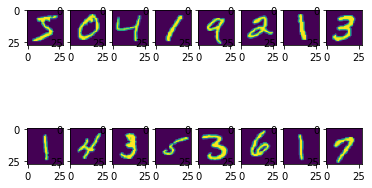

In [ ]:
#####################################
###########original data#############
for i in range(16):
  img = X_train[i].reshape(28, 28)
  plt.subplot(2, 8, i+1)
  plt.imshow(img)

In [ ]:
#####################################
#####autoencoder 예측된 데이터#######
##############X_train################
predicted_X = autoencoder.predict(X_train)
predicted_X.shape

(60000, 784)

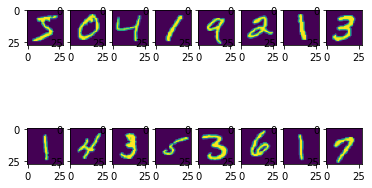

In [ ]:
for i in range(16):
  img = X_train[i].reshape(28, 28)
  plt.subplot(2, 8, i+1)
  plt.imshow(img)

In [ ]:
##################################################
# 학습이 잘 되었는지 확인하기 위해
# encoder에 X_test를 넣어 압축된
# predict 이미지 생성
##################################################

predict_encoded_img = encoding_model.predict(X_test)

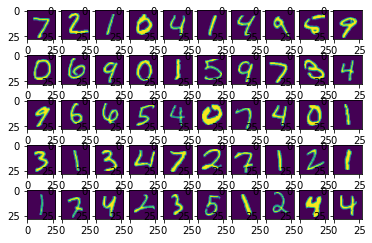

In [ ]:
for i in range(50):
  plt.subplot(5, 10, i+1)
  plt.imshow(X_test[i].reshape(28, 28))
plt.show()

In [ ]:
##################################################
# 학습이 잘 되었는지 확인하기 위해
# autoencoder에 X_test를 넣어 압축된
# predict 이미지 생성
##################################################

predict_autoencoded_img = autoencoder.predict(X_test)

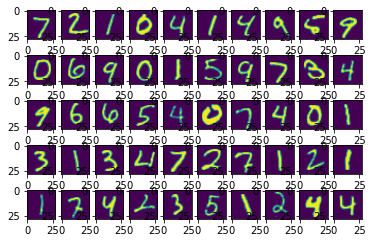

In [ ]:
for i in range(50):
  plt.subplot(5, 10, i+1)
  plt.imshow(predict_autoencoded_img[i].reshape(28, 28))
plt.show()